In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, hilbert


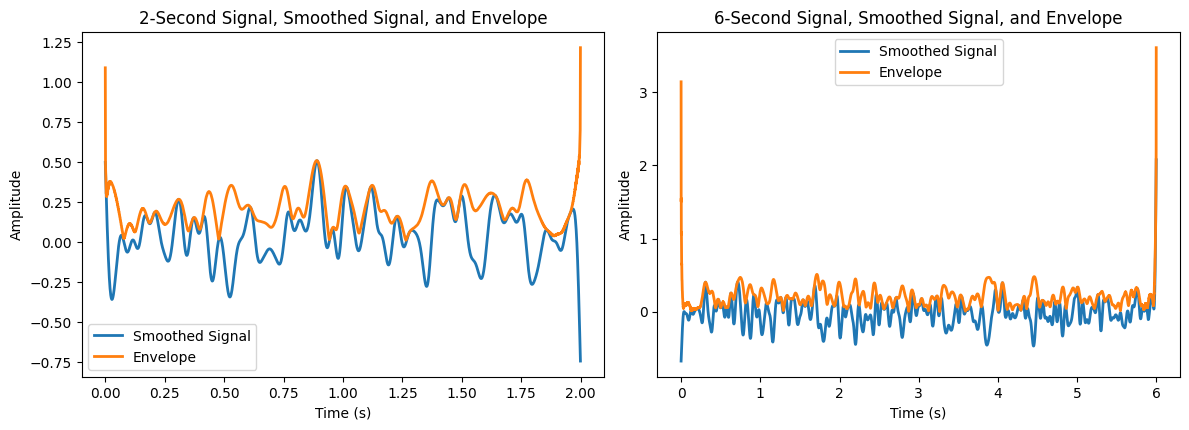

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, hilbert, filtfilt

# Parameters
sfreq = 1000  # Sampling frequency
signal_length_2s = 2  # Length of 2-second signal in seconds
signal_length_6s = 6  # Length of 6-second signal in seconds
h_freq = 30  # High-pass cutoff frequency in Hz
l_freq = 45  # Low-pass cutoff frequency in Hz
h_trans_bandwidth = 1  # Transition bandwidth for high-pass filter in Hz
l_trans_bandwidth = 1  # Transition bandwidth for low-pass filter in Hz
_length_factors = 3.3  # Length factor for filter
lp_cutoff = 20  # Low-pass filter cutoff frequency

# Generate time vector for 2s and 6s signals
time_2s = np.arange(0, signal_length_2s, 1/sfreq)
time_6s = np.arange(0, signal_length_6s, 1/sfreq)

# Generate random signals for 2s and 6s
np.random.seed(42)  # For reproducibility
signal_2s = np.random.randn(len(time_2s))
signal_6s = np.random.randn(len(time_6s))

# Create a low-pass FIR filter
lp_filter = firwin(101, lp_cutoff/(sfreq/2))

# Apply the low-pass filter to smooth the signal
smooth_signal_2s = filtfilt(lp_filter, 1.0, signal_2s)
smooth_signal_6s = filtfilt(lp_filter, 1.0, signal_6s)

# Create FIR Hilbert transform filter
filter_length_2s = int(sfreq * _length_factors / min(h_trans_bandwidth, l_trans_bandwidth))
filter_length_6s = int(sfreq * _length_factors / min(h_trans_bandwidth, l_trans_bandwidth))

fir_coeff_2s = firwin(filter_length_2s, [h_freq, l_freq], pass_zero=False, fs=sfreq)
fir_coeff_6s = firwin(filter_length_6s, [h_freq, l_freq], pass_zero=False, fs=sfreq)

# Apply Hilbert transform to smoothed signals to get envelopes
hilbert_transform_2s = hilbert(smooth_signal_2s)
envelope_2s = np.abs(hilbert_transform_2s)

hilbert_transform_6s = hilbert(smooth_signal_6s)
envelope_6s = np.abs(hilbert_transform_6s)

# Plotting
plt.figure(figsize=(12, 8))

# Plot original 2s signal, smoothed signal, and its envelope
plt.subplot(2, 2, 1)
# plt.plot(time_2s, signal_2s, label='Original Signal (2s)', alpha=0.7)
plt.plot(time_2s, smooth_signal_2s, label='Smoothed Signal', linewidth=2)
plt.plot(time_2s, envelope_2s, label='Envelope', linewidth=2)
plt.title('2-Second Signal, Smoothed Signal, and Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot original 6s signal, smoothed signal, and its envelope
plt.subplot(2, 2, 2)
# plt.plot(time_6s, signal_6s, label='Original Signal (6s)', alpha=0.7)
plt.plot(time_6s, smooth_signal_6s, label='Smoothed Signal', linewidth=2)
plt.plot(time_6s, envelope_6s, label='Envelope', linewidth=2)
plt.title('6-Second Signal, Smoothed Signal, and Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
